In [1]:
import math
import numpy as np
import json
import pandas as pd
import glob

from src.constants import OUTPUTS_DIR

In [2]:
experiment_file_1 = OUTPUTS_DIR / "estimate_effect_of_interleaver_conditional_entropy_variable_blocklen.json"
experiment_file_1_1 = OUTPUTS_DIR / "estimate_effect_of_interleaver_conditional_entropy_variable_blocklen_repro.wrong.json"
# experiment_file_1 = OUTPUTS_DIR / "estimate_effect_of_interleaver_conditional_entropy_variable_blocklen_repro.wrong2.json"
# experiment_file_1 = OUTPUTS_DIR / "estimate_effect_of_interleaver_conditional_entropy_variable_blocklen_repro.json"
experiment_file_2 = OUTPUTS_DIR / "estimate_ce_turbo_jtree_nonrecursive_1.json"
experiment_file_3 = OUTPUTS_DIR / "estimate_ce_turbo_jtree_nonrecursive_2.json"
experiment_file_4 = OUTPUTS_DIR / "estimate_ce_turbo_jtree_nonrecursive_6.json"
experiment_file_5 = OUTPUTS_DIR / "estimate_ce_turbo_jtree_nonrecursive_3.json"
experiment_file_6 = OUTPUTS_DIR / "estimate_ce_turbo_jtree_nonrecursive_4.json"
experiment_file_7 = OUTPUTS_DIR / "estimate_ce_turbo_jtree_nonrecursive_5.json"
experiment_file_8 = OUTPUTS_DIR / "estimate_ce_turbo_jtree_nonrecursive_8.json"
experiment_file_9 = OUTPUTS_DIR / "estimate_xe_bcjr_varying_block_len.json"
experiment_file_10 = OUTPUTS_DIR / "estimate_ce_turboae_binary_jtree_nonrecursive_1.json" 
experiment_file_11 = OUTPUTS_DIR / "estimate_ce_turboae_binary_jtree_nonrecursive_2.json"
experiment_file_12 = OUTPUTS_DIR / "estimate_ce_turboae_binary_jtree_nonrecursive_3.json"
experiment_file_13 = OUTPUTS_DIR / "estimate_ce_turboae_binary_jtree_nonrecursive_4.json"
experiment_file_14 = OUTPUTS_DIR / "estimate_xe_turboae_bcjr_varying_block_len.json"


experiment_file_15 = OUTPUTS_DIR / "estimate_ce_turbo_random_jtree_nonrecursive_1.json" 
experiment_file_16 = OUTPUTS_DIR / "estimate_ce_turbo_random_jtree_nonrecursive_2.json"
experiment_file_17 = OUTPUTS_DIR / "estimate_ce_turbo_random_jtree_nonrecursive_3.json"
experiment_file_18 = OUTPUTS_DIR / "estimate_ce_turbo_random_jtree_nonrecursive_4.json"

experiment_file_19 = OUTPUTS_DIR / "estimate_ce_turbo_tae_approx_jtree_nonrecursive_1.json"
experiment_file_20 = OUTPUTS_DIR / "estimate_ce_turbo_tae_approx_jtree_nonrecursive_2.json"
experiment_file_21 = OUTPUTS_DIR / "estimate_ce_turbo_tae_approx_jtree_nonrecursive_3.json"
experiment_file_22 = OUTPUTS_DIR / "estimate_ce_turbo_tae_approx_jtree_nonrecursive_4.json"

experiment_file_23 = OUTPUTS_DIR / "estimate_xe_turbo_random_nonsys_bcjr_varying_block_len.json"
experiment_file_24 = OUTPUTS_DIR / "estimate_xe_turbo_tae_approx_nonsys_bcjr_varying_block_len.json"

experiment_file_25 = OUTPUTS_DIR / "estimate_xe_bcjr_varying_block_len.json"




# experiment_files = [experiment_file_1, experiment_file_2, experiment_file_3, experiment_file_4]
experiment_files = [
    experiment_file_1, 
    experiment_file_2, 
    experiment_file_3, 
    experiment_file_4,
    experiment_file_5,
    experiment_file_6,
    experiment_file_7,
    experiment_file_8,
    experiment_file_9,
    experiment_file_10,
    experiment_file_11,
    experiment_file_12,
    experiment_file_13,
    experiment_file_14,
    experiment_file_15,
    experiment_file_16,
    experiment_file_17,
    experiment_file_18,
    experiment_file_19,
    experiment_file_20,
    experiment_file_21,
    experiment_file_22,
    experiment_file_23,
    experiment_file_24,
    experiment_file_25
]

In [8]:
exp_result_dfs = []
for exp_file in experiment_files:
    with open(exp_file, "r") as e:
        results = json.load(e)
    is_jtree = (
        results["preamble"]["experiment_name"]
        == "turbo_conditional_entropy_experiment_jtree"
    )
    is_bcjr = results["preamble"]["experiment_name"] == "benchmark_trellis_turbo_codes"
    exp_results = pd.DataFrame(
        [
            {
                **d["results"],
                **d["preamble"]["args"],
                "interleaver": ("interleaver" in d["preamble"]) or is_jtree or is_bcjr,
                "jtree": is_jtree,
                "wrong1": exp_file == experiment_file_1_1,
                "bcjr": is_bcjr,
            }
            for d in results["data"]
            if "results" in d
        ]
    )

    snr_vals = [0.0]
    exp_results = exp_results[exp_results["snr"].isin(snr_vals)]
    select_cols = (
        ["block_len", "encoder_name"]
        + (["ce__mean", "ce__err"] if "ce__mean" in exp_results.columns else [])
        + (
            ["true_ber__mean", "true_ber__err"]
            if "true_ber__mean" in exp_results.columns
            else []
        )
        + (["ber__mean", "ber__err"] if "ber__mean" in exp_results.columns else [])
        + (["bler__mean", "bler__err"] if "bler__mean" in exp_results.columns else [])
        + (["xe__mean", "xe__err"] if "xe__mean" in exp_results.columns else [])
        + (["num_iter"] if "num_iter" in exp_results.columns else [])
        + ["snr", "interleaver", "jtree", "wrong1", "bcjr"]
    )
    exp_results = exp_results[select_cols]
    encoder_filter = [
        "conv_75_1_00",
        "conv_73_1_10",
        "conv_15_7_00",
        "turboae_binary_exact_nobd",]
    #     "turbo_random1_nonsys",
    #     "turbo_random2_nonsys",
    #     "turbo_random3_nonsys",
    #     "turbo_random4_nonsys",
    #     "turbo_random5_nonsys",
    #     "tae_turbo_approximated_nonsys1",
    #     "tae_turbo_approximated_nonsys2",
    #     "tae_turbo_approximated_nonsys3",
    #     "tae_turbo_approximated_nonsys4",
    # ]
    # # Random and turboae
    # encoder_filter = [
    #     # "turbo_random1_nonsys",
    #     # "turbo_random2_nonsys",
    #     "turbo_random3_nonsys",
    #     # "turbo_random4_nonsys",
    #     "turbo_random5_nonsys",
    #     "turboae_binary_exact_nobd",
    # ]
    # Turboae and Approx
    # encoder_filter = [
    #     "turboae_binary_exact_nobd",
    #     "tae_turbo_approximated_nonsys1",
    #     "tae_turbo_approximated_nonsys2",
    #     "tae_turbo_approximated_nonsys3",
    #     "tae_turbo_approximated_nonsys4",
    # ]
    # encoder_filter = ["conv_75_1_00"]
    exp_results = exp_results[exp_results["encoder_name"].isin(encoder_filter)]
    if "num_iter" in exp_results.columns:
        exp_results = exp_results[exp_results["num_iter"] == 20]

    # Final filter to remove wrong turbo code prior measurements
    exp_results = exp_results[
        exp_results["interleaver"] == (exp_results["jtree"] | exp_results["bcjr"])
    ]

    # Remove later block lengths
    exp_results = exp_results[exp_results["block_len"] <= 60]

    exp_result_dfs.append(exp_results)

exp_results = pd.concat(exp_result_dfs)


In [9]:
# display(exp_results[(~exp_results["jtree"]) & (~exp_results["interleaver"])])
# display(exp_results[exp_results["jtree"]])
# display(exp_results[exp_results["bcjr"]])
display(exp_results[exp_results["bcjr"]]["encoder_name"].tolist())

['conv_75_1_00',
 'conv_73_1_10',
 'conv_75_1_00',
 'conv_73_1_10',
 'conv_75_1_00',
 'conv_73_1_10',
 'conv_75_1_00',
 'conv_73_1_10',
 'conv_75_1_00',
 'conv_73_1_10',
 'conv_75_1_00',
 'conv_73_1_10',
 'conv_75_1_00',
 'conv_73_1_10',
 'conv_75_1_00',
 'conv_73_1_10',
 'conv_75_1_00',
 'conv_73_1_10',
 'conv_75_1_00',
 'conv_73_1_10',
 'turboae_binary_exact_nobd',
 'turboae_binary_exact_nobd',
 'turboae_binary_exact_nobd',
 'turboae_binary_exact_nobd',
 'turboae_binary_exact_nobd',
 'turboae_binary_exact_nobd',
 'turboae_binary_exact_nobd',
 'turboae_binary_exact_nobd',
 'conv_75_1_00',
 'conv_73_1_10',
 'conv_75_1_00',
 'conv_73_1_10',
 'conv_75_1_00',
 'conv_73_1_10',
 'conv_75_1_00',
 'conv_73_1_10',
 'conv_75_1_00',
 'conv_73_1_10',
 'conv_75_1_00',
 'conv_73_1_10',
 'conv_75_1_00',
 'conv_73_1_10',
 'conv_75_1_00',
 'conv_73_1_10',
 'conv_75_1_00',
 'conv_73_1_10',
 'conv_75_1_00',
 'conv_73_1_10']

turboae_binary_exact_nobd
conv_75_1_00
conv_73_1_10
conv_75_1_00
conv_15_7_00
conv_73_1_10


/tmp/ipykernel_23332/1102120962.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


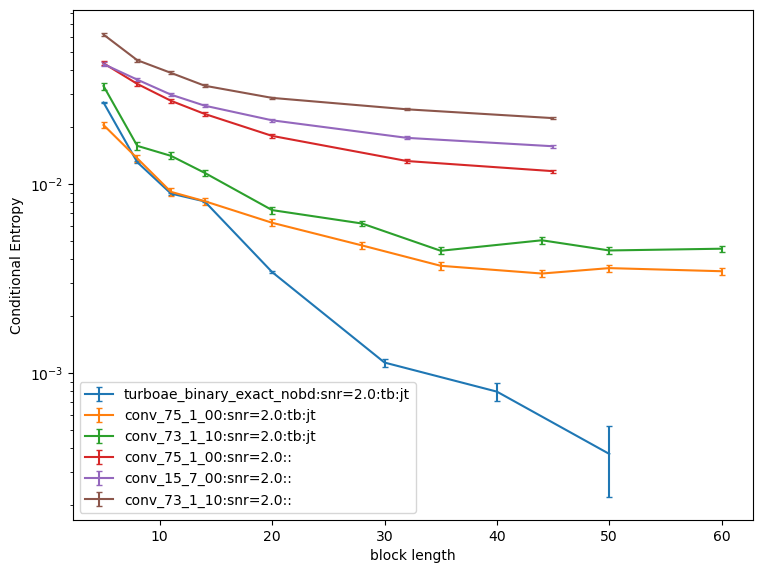

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
capsize = 2

def final_ce(group):
    (encoder_name, snr, is_turbo, is_jtree, is_bcjr, _), exp_result = group
    return exp_result.sort_values("block_len")["ce__mean"].iloc[-1]

num_turbo = 100
num_conv = 100
count_turbo = 0
count_conv = 0

for (encoder_name, snr, is_turbo, is_jtree, is_bcjr, _), exp_result in sorted(exp_results[exp_results["ce__mean"].notna()].groupby(["encoder_name", "snr", "interleaver", "jtree", "wrong1", "bcjr"]), key=final_ce):
    print(encoder_name)
    if is_turbo :
        if count_turbo >= num_turbo:
            continue
        else:
            count_turbo += 1
    else:
        if count_conv >= num_conv:
            continue
        else:
            count_conv += 1
    exp_result = exp_result.sort_values("block_len")
    ax.errorbar(
        exp_result["block_len"], 
        exp_result["ce__mean"], 
        yerr=exp_result["ce__err"], 
        linestyle='-',
        capsize=capsize,
        label=f"{encoder_name}:snr={snr}:{'tb' if is_turbo else ''}:{'jt' if is_jtree else ''}"
    )
ax.legend()
ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel('block length')
ax.set_ylabel('Conditional Entropy')

fig.show()

True
True
True
True
True
True


/tmp/ipykernel_23332/3256603364.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


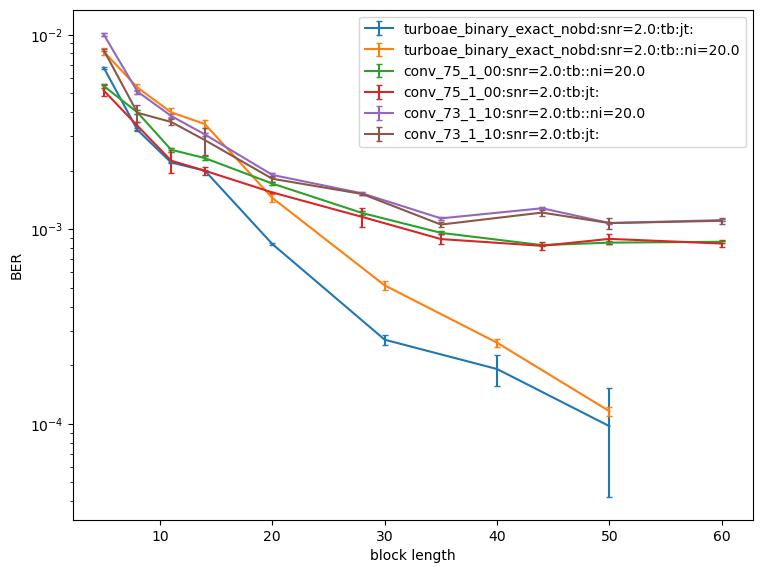

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
capsize = 2

def final_ber(group):
    _, exp_result = group
    return exp_result.sort_values("block_len")["ber__mean"].iloc[-1]

num_turbo = 100
num_conv = 100
count_turbo = 0
count_conv = 0

for (
    encoder_name, snr, is_turbo, is_jtree, is_bcjr, num_iter, _
), exp_result in sorted(
    exp_results.loc[exp_results["ber__mean"].notna()]
        .groupby(["encoder_name", "snr", "interleaver", "jtree", "bcjr", "num_iter", "wrong1"], dropna=False), 
    key=final_ber
    ):
    if is_turbo :
        if count_turbo >= num_turbo:
            continue
        else:
            count_turbo += 1
    else:
        if count_conv >= num_conv:
            continue
        else:
            count_conv += 1
    
    exp_result = exp_result.sort_values("block_len")
    # print(exp_result.columns)
    print("true_ber__mean" in exp_result.columns)
    ber = exp_result["true_ber__mean"] if exp_result["true_ber__mean"].notna().all() else exp_result["ber__mean"]
    ber_err = exp_result["true_ber__err"] if exp_result["true_ber__err"].notna().all() else exp_result["ber__err"]
    # print(ber) 
    ax.errorbar(
        exp_result["block_len"], 
        ber, 
        yerr=ber_err, 
        linestyle='-',
        capsize=capsize,
        label=f"{encoder_name}:snr={snr}:{'tb' if is_turbo else ''}:{'jt' if is_jtree else ''}:{'ni=' + str(num_iter) if pd.notna(num_iter) else ''}"
    )
ax.legend()
ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel('block length')
ax.set_ylabel('BER')

fig.show()

/tmp/ipykernel_23332/2515010343.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


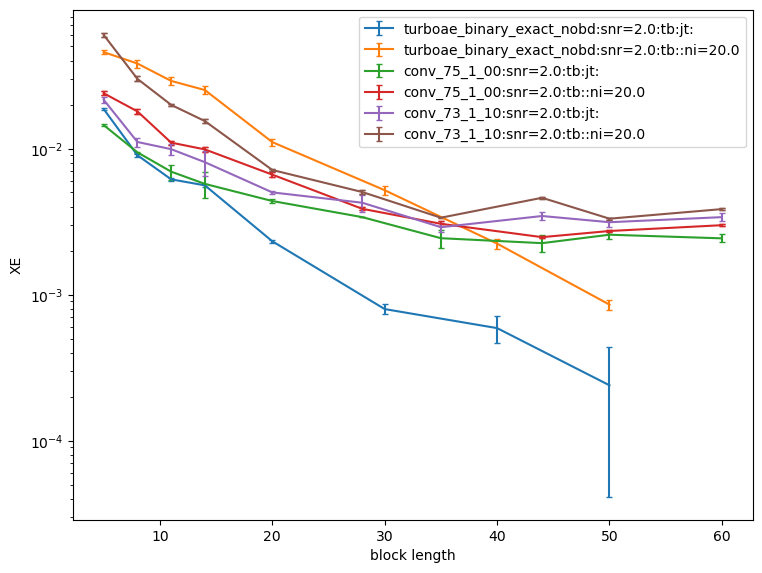

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
capsize = 2

def final_xe(group):
    _, exp_result = group
    return exp_result.sort_values("block_len")["xe__mean"].iloc[-1]

num_turbo = 100
num_conv = 100
count_turbo = 0
count_conv = 0

for (
    encoder_name, snr, is_turbo, is_jtree, is_bcjr, _, num_iter
), exp_result in sorted(
    exp_results.loc[exp_results["xe__mean"].notna()]
        .groupby(["encoder_name", "snr", "interleaver", "jtree", "bcjr", "wrong1", "num_iter"], dropna=False), 
    key=final_xe
    ):
    if is_turbo :
        if count_turbo >= num_turbo:
            continue
        else:
            count_turbo += 1
    else:
        if count_conv >= num_conv:
            continue
        else:
            count_conv += 1
    
    exp_result = exp_result.sort_values("block_len")
    ax.errorbar(
        exp_result["block_len"], 
        exp_result["xe__mean"], 
        yerr=exp_result["xe__err"], 
        linestyle='-',
        capsize=capsize,
        label=f"{encoder_name}:snr={snr}:{'tb' if is_turbo else ''}:{'jt' if is_jtree else ''}:{'ni=' + str(num_iter) if pd.notna(num_iter) else ''}"
    )
ax.legend()
ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel('block length')
ax.set_ylabel('XE')

fig.show()